In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import ipywidgets as widget

## Setting up the model: OLG with PAYG

In this model we assume that the CRRA coefficient is equal to 1, so we therefore assume logarithmic utility. Furthermore, we assume that the young supply 1 unit of labor that is supplied inelastically. Factors are paid their marginal products. 

**Write OLG model equation and assumptions here

In [2]:
# a. Defining all symbols 
alpha = 0.33 # Allocation
delta = 0.10 # Depreciation rate
A = 9.0 # Technology
beta = 0.8 # Patience paramater
tax = 0.3 # Social Security tax 
n = 0.10 # Population grwoth rate
k_min = 0.01 # Minimum capital level
k_max = 5.00 # Maximum capital level

In [3]:
def factor_prices(k, delta, A, alpha):
    '''
    Function to aggregate factor prices 
    
    Arguments:
    k(float): Capital per person
    delta(float): Depreciation rate
    A(float): Technology
    alpha(float): Capital Allocation

    Returns:
    R(float): Gross interest rate
    w(float): Wage rate
    '''
    
    output = A*k**alpha # Total output subject to capital per person
    r = A*alpha*k**(alpha-1) # Calculating capital rental rate
    R = 1 + r - delta # Calculating Gross interest rate
    
    w = output-r*k # Calculating wage rate
    
    return R, w

In [4]:
def utility(s, w, tax, R_update, beta, n):
    '''
    Used to calculate aggregate utility across both cohorts
    
    Arguments:
    
    w(float): Wage rate
    R_update(float): Gross interest rate at t+1
    
    
    Returns:
    Total utility
    '''
    
    T = w*tax
    
    # Sum of utility across cohorts
    
    U = np.log(w - T - s) + beta*np.log(R_update * s + T*(1+n))
    
    return U

In [5]:
def optimize_savings(w, R_update, tax):
    '''
    Find optimal savings
    
    Arguments:
    w(float): Wage rate
    R_update(float): Gross interest rate at t+1
    
    Returns:
    yields optimal level of savings given wage and future gross interest rate
    '''
    
    # Create negative util function for minimization
    s = optimize.fminbound(lambda s: -utility(s, w, tax, R_update, beta, n), 0, w)
    
    return s

In [6]:
 def min_dev(k_update, k_min, k_max, tax):
        '''
        Function that calculates the value of k that achieves the steady state
        
        Arguments:
        k_update(float): Captial per person at t+1
        k_min(float): Minimum capital per person in model
        k_max(float): Maximum capital per person in model
        
        returns:
        Value of k that achieves the level of savings to make savings equivalent to capital per person at t+1
        '''

        R_update, w_update = factor_prices(k_update, delta, A, alpha)

        def min_function(k):

            R, w = factor_prices(k, delta, A, alpha)
            s = optimize_savings(w, R_update, tax)

            return (k_update - s/(1 + n)) ** 2

        k = optimize.fminbound(min_function, k_min, k_max)

        return k
    

In [7]:
def find_values(k_min, k_max, tax, n):
    '''
    Output lists of all of our key outputs
    
    Arguments:
    k_min(float): Minimum capital per person in model
    k_max(float): Maximum capital per person in model
    tax(float): Redistributive tax
    n(int): Number of seperations between min and max capital in the model
    
    Returns:
    key outputs of the model
    '''
    num = 1000
    k_update_vector = np.linspace(k_min, k_max, num) # numpy array containing captial per person at t+1
    k_vec = [] # Capital per person at t
    s_vec = [] # List of savings
    R_vec = [] # List of gross interest rate at t+1
    w_fut_vec = [] # List of wage rate at t+1
    w_vec = [] # List of wage rate at t
    c_young_vec = [] # List of consumption when young
    c_old_vec = [] # List of Consumption when old
    
    for k_update in k_update_vector:
        k = min_dev(k_update, k_min, k_max, tax)
        k_vec.append(k)
        R_fut, w_fut = factor_prices(k_update, delta, A, alpha)
        R, w = factor_prices(k, delta, A, alpha)
        R_vec.append(R_fut)
        w_fut_vec.append(w_fut)
        w_vec.append(w)
        s = optimize_savings(w, R_fut, tax)
        s_vec.append(s)
        c_young = w - s - w*tax
        c_old = R_fut*s + w*tax*(1+n)
        c_young_vec.append(c_young)
        c_old_vec.append(c_old)
        
    
    return k_vec, s_vec, R_vec, w_vec, c_young_vec, c_old_vec

In [8]:
k_vec, s_vec, R_vec, w_vec, c_young_vec, c_old_vec = find_values(k_min, k_max, tax, n)


## Plotting 

Introduction to what we will be analyzing

Text(0, 0.5, '$k_{t+1}$')

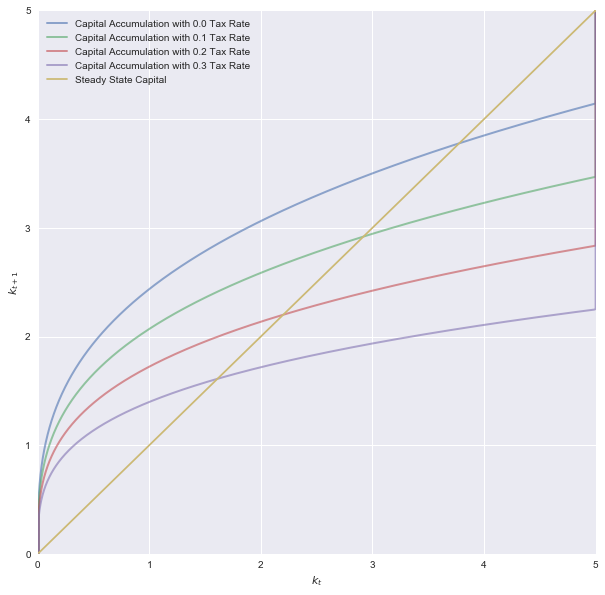

In [10]:
# a. output the capital accumulation curve when tax rate adjusts
k_update_vector = np.linspace(k_min, k_max, 1000)

fig, ax = plt.subplots(figsize=(10,10))

taxes=[0.0, 0.1, 0.2, 0.3]
for tax in taxes:
    k_vec, s_vec, R_vec, w_vec, c_young_vec, c_old_vec = find_values(k_min, k_max, tax, n)
    ax.plot(k_vec, k_update_vector, linewidth=2, alpha=0.6, label='Capital Accumulation with '+str(tax)+' Tax Rate')


ax.plot(k_vec, k_vec, label='Steady State Capital')
ax.legend()
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_xlabel("$k_t$")
ax.set_ylabel("$k_{t+1}$")

**Describe Output

Text(0, 0.5, '$R_{t+1}$')

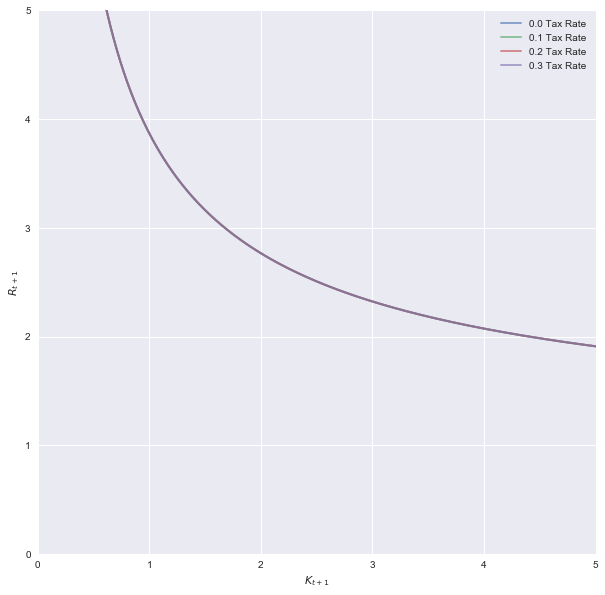

In [11]:
# b. Output the relationship between capital and interest rate when tax rate adjusts
fig, ax = plt.subplots(figsize=(10,10))

taxes=[0.0, 0.1, 0.2, 0.3]
for tax in taxes:
    k_vec, s_vec, R_vec, w_vec, c_young_vec, c_old_vec = find_values(k_min, k_max, tax, n)
    ax.plot(k_update_vector, R_vec, linewidth=2, alpha=0.6, label=str(tax)+' Tax Rate')



ax.legend()
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_xlabel("$K_{t+1}$")
ax.set_ylabel("$R_{t+1}$")

** Describe output

Text(0, 0.5, 'Savings')

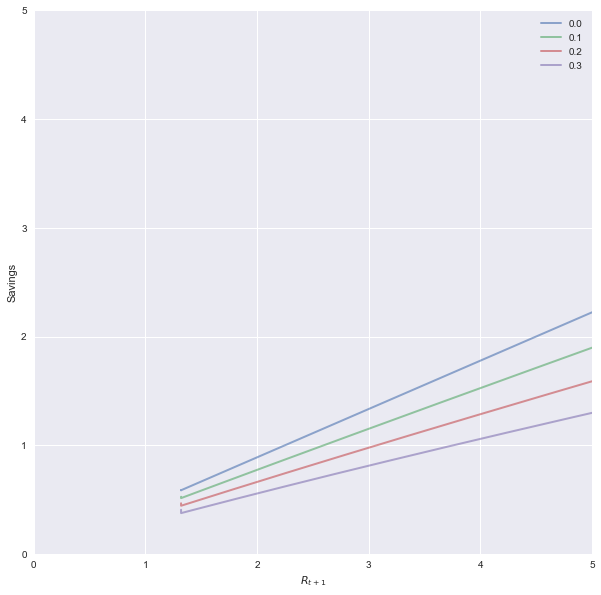

In [12]:
# Ourput the relationship between wage rate and savings when tax rate adjusts
fig, ax = plt.subplots(figsize=(10,10))

taxes=[0.0, 0.1, 0.2, 0.3]
for tax in taxes:
    k_vec, s_vec, R_vec, w_vec, c_young_vec, c_old_vec = find_values(k_min, k_max, tax, n)
    ax.plot(w_vec, s_vec, linewidth=2, alpha=0.6, label=str(tax)+' Tax Rate'S)



ax.legend()
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_xlabel("Wage Rate")
ax.set_ylabel("Savings")

** Describe output

## Conclusion